## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This project analyzes academic growth data for elementary students enrolled in Paul’s Place After 3, an after-school program in Baltimore. Students completed diagnostic assessments in reading and math at both the beginning (BOY) and middle (MOY) of the school year. Additional context includes grade level, school attended, and the median household income of their ZIP code. The goal is to identify patterns in student growth and flag students who may need additional academic support.

* Features

    * reading_boy – Beginning-of-year reading diagnostic score

    * reading_moy – Middle-of-year reading diagnostic score

    * math_boy – Beginning-of-year math diagnostic score

    * math_moy – Middle-of-year math diagnostic score

    * grade – Student grade level (K–5)

    * median_household_income – Estimated income of student’s ZIP code
    

* Labels / Targets

    * reading_risk_result – 0 if On Track in reading, 1 if At Risk (based on MOY cut scores)

    * math_risk_result – 0 if On Track in math, 1 if At Risk

    * reading_growth and math_growth – Change in scores from BOY to MOY



In [2]:
df = pd.read_excel("after3_data.xlsx")

In [3]:
df.head()

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,zipcode,type,median_household_income,median_household_income_in_Maryland
0,S001,Charles Carroll Barrister Elementary,K,350,375,399,458,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
1,S002,Charles Carroll Barrister Elementary,Pre-K,na,na,na,na,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
2,S003,Charles Carroll Barrister Elementary,K,301,309,249,324,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
3,S004,Charles Carroll Barrister Elementary,1st,364,382,326,370,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
4,S005,Charles Carroll Barrister Elementary,1st,375,380,325,382,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678


### Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   student_id                           146 non-null    object 
 1   school_name                          146 non-null    object 
 2   grade_level                          146 non-null    object 
 3   math_boy                             121 non-null    object 
 4   math_moy                             89 non-null     object 
 5   reading_boy                          133 non-null    object 
 6   reading_moy                          93 non-null     object 
 7   address                              146 non-null    object 
 8   longitude                            146 non-null    float64
 9   latitude                             146 non-null    float64
 10  zipcode                              146 non-null    int64  
 11  type                            

In [5]:
df.describe()

,longitude,latitude,zipcode,median_household_income,median_household_income_in_Maryland
count,1.460000e+02,146.000000,146.000000,146.000000,146.0
mean,1.415850e+06,588086.303351,21227.746575,77316.109589,98678.0
std,1.125145e+03,271.089144,3.281740,24536.161640,0.0
min,1.414747e+06,587727.427159,21223.000000,41828.000000,98678.0
25%,1.414747e+06,587727.427159,21223.000000,41828.000000,98678.0
50%,1.415342e+06,588145.469630,21230.000000,94164.000000,98678.0
75%,1.417345e+06,588388.613501,21230.000000,94164.000000,98678.0
max,1.417345e+06,588388.613501,21230.000000,94164.000000,98678.0


In [7]:
df.isnull().sum()

student_id                              0
school_name                             0
grade_level                             0
math_boy                               25
math_moy                               57
reading_boy                            13
reading_moy                            53
address                                 0
longitude                               0
latitude                                0
zipcode                                 0
type                                    0
median_household_income                 0
median_household_income_in_Maryland     0
dtype: int64

In [8]:
df['grade_level'].unique()
df['math_moy'].unique()
df['reading_moy'].unique()

array([458, 'na', 324, 370, 382, 361, 365, 353, 376, 436, 341, 340, 374,
       375, 356, 367, 'transferred', 359, 360, 338, 337, 390, 319, 320,
       342, 427, 333, 418, 404, 437, 354, 416, 386, 373, 400, 294, 350,
       449, 330, 391, 300, 392, 435, 397, nan, 448, 384, 430, 465, 346,
       371, 399, 410, 423, 329, 429, 426, 432, 425, 357, 405, 419, 422,
       442, 439, 395, 401, 396, 339, 413, 415, 293, 363, 421],
      dtype=object)

In [9]:
# Convert score columns to numeric, force errors to become NaN
score_cols = ['math_boy', 'math_moy', 'reading_boy', 'reading_moy']

for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check that it worked — this will now show true NaNs instead of 'na' or 'transferred'
df[score_cols].isnull().sum()

math_boy       29
math_moy       61
reading_boy    17
reading_moy    57
dtype: int64

In [10]:
df

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,zipcode,type,median_household_income,median_household_income_in_Maryland
0,S001,Charles Carroll Barrister Elementary,K,350.0,375.0,399.0,458.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
1,S002,Charles Carroll Barrister Elementary,Pre-K,NaN,NaN,NaN,NaN,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
2,S003,Charles Carroll Barrister Elementary,K,301.0,309.0,249.0,324.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
3,S004,Charles Carroll Barrister Elementary,1st,364.0,382.0,326.0,370.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
4,S005,Charles Carroll Barrister Elementary,1st,375.0,380.0,325.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,S142,Southwest Baltimore Charter,4th,415.0,NaN,516.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678
142,S143,Southwest Baltimore Charter,4th,435.0,NaN,480.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678
143,S144,Southwest Baltimore Charter,4th,397.0,NaN,439.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678
144,S145,Southwest Baltimore Charter,4th,NaN,NaN,474.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678


In [11]:
swb_boy_only = df[
    (df['school_name'].str.contains('Southwest', case=False)) &
    (df['reading_moy'].isnull()) &
    (df['reading_boy'].notnull())
]

In [12]:
# Step 1: Clean grade_level values and convert to numeric "grade"
df['grade_level'] = df['grade_level'].replace({
    'Pre-K/K': 'K'  # Treat "Pre-K/K" as Kindergarten
})

# Step 2: Map grade levels to numeric (K = 0, 1st = 1, ..., 5th = 5)
grade_map = {
    'K': 0,
    '1st': 1,
    '2nd': 2,
    '3rd': 3,
    '4th': 4,
    '5th': 5
}

df['grade'] = df['grade_level'].map(grade_map)

# Step 3: Drop rows that aren't K–5 (i.e., where grade is still missing)
df = df[df['grade'].notna()].copy()

# Preview result
df[['student_id', 'grade_level', 'grade']].head()


,student_id,grade_level,grade
0,S001,K,0.0
2,S003,K,0.0
3,S004,1st,1.0
4,S005,1st,1.0
5,S006,1st,1.0


In [13]:
df.head(50)

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,zipcode,type,median_household_income,median_household_income_in_Maryland,grade
0,S001,Charles Carroll Barrister Elementary,K,350.0,375.0,399.0,458.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0
2,S003,Charles Carroll Barrister Elementary,K,301.0,309.0,249.0,324.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0
3,S004,Charles Carroll Barrister Elementary,1st,364.0,382.0,326.0,370.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
4,S005,Charles Carroll Barrister Elementary,1st,375.0,380.0,325.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
5,S006,Charles Carroll Barrister Elementary,1st,352.0,321.0,310.0,361.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
6,S007,Charles Carroll Barrister Elementary,1st,382.0,385.0,326.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
7,S008,Charles Carroll Barrister Elementary,1st,360.0,359.0,318.0,365.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
8,S009,Charles Carroll Barrister Elementary,1st,319.0,356.0,302.0,353.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
9,S010,Charles Carroll Barrister Elementary,1st,354.0,370.0,327.0,376.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0
10,S011,Charles Carroll Barrister Elementary,2nd,404.0,417.0,359.0,436.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,2.0


### Filter for Southwest Baltimore students who only have BOY reading scores

In [14]:
# Filter for Southwest Baltimore students who only have BOY reading scores
swb_boy_only = df[
    (df['school_name'].str.contains('Southwest', case=False)) &
    (df['reading_moy'].isnull()) &
    (df['reading_boy'].notnull())
]

# Preview a few rows to confirm
swb_boy_only[['student_id', 'school_name', 'grade', 'reading_boy', 'reading_moy']].head()


,student_id,school_name,grade,reading_boy,reading_moy
99,S100,Southwest Baltimore Charter,1.0,517.0,NaN
102,S103,Southwest Baltimore Charter,1.0,392.0,NaN
104,S105,Southwest Baltimore Charter,1.0,533.0,NaN
105,S106,Southwest Baltimore Charter,1.0,431.0,NaN
106,S107,Southwest Baltimore Charter,1.0,462.0,NaN


### Define BOY cut scores for reading

In [15]:
# Define BOY cut scores for reading
reading_boy_cut = {
    0: 295,  # K
    1: 347,
    2: 419,
    3: 474,
    4: 496,
    5: 542
}

# Apply the cut scores to create a risk label
swb_boy_only['reading_boy_risk'] = swb_boy_only.apply(
    lambda row: 'At Risk' if row['reading_boy'] < reading_boy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

# Preview the result
swb_boy_only[['student_id', 'grade', 'reading_boy', 'reading_boy_risk']].head()


/var/folders/cc/f23cb96j343bd47wb64prrc80000gn/T/ipykernel_89160/1371132476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swb_boy_only['reading_boy_risk'] = swb_boy_only.apply(


,student_id,grade,reading_boy,reading_boy_risk
99,S100,1.0,517.0,On Track
102,S103,1.0,392.0,On Track
104,S105,1.0,533.0,On Track
105,S106,1.0,431.0,On Track
106,S107,1.0,462.0,On Track


In [16]:
swb_boy_only.loc[:, 'reading_boy_risk'] = swb_boy_only.apply(
    lambda row: 'At Risk' if row['reading_boy'] < reading_boy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

/var/folders/cc/f23cb96j343bd47wb64prrc80000gn/T/ipykernel_89160/4256009063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swb_boy_only.loc[:, 'reading_boy_risk'] = swb_boy_only.apply(


In [17]:
swb_boy_only = df[
    (df['school_name'].str.contains('Southwest', case=False)) &
    (df['reading_moy'].isnull()) &
    (df['reading_boy'].notnull())
].copy()


In [18]:
swb_boy_only['reading_boy_risk'] = swb_boy_only.apply(
    lambda row: 'At Risk' if row['reading_boy'] < reading_boy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

### Count of students by risk status (reading)

In [19]:
# Count of students by risk status
swb_boy_only['reading_boy_risk'].value_counts()

On Track    29
At Risk     11
Name: reading_boy_risk, dtype: int64

### Percentage of students at risk (reading)

### What The Data Tells Us:
We have 40 students at Southwest Baltimore Charter with only BOY reading scores.

Of those:

    * 29 students (72.5%) were On Track

    * 11 students (27.5%) were At Risk
    
### Southwest Baltimore Charter was excluded from MOY growth and risk analysis due to missing midyear diagnostic scores. However, based on BOY reading scores alone, 27.5% of students were already flagged as At Risk using i-Ready national cut scores.

### If trends align with other schools in the After 3 program, this group would likely show similar needs for midyear intervention and academic support.
_________________________________________________________________________________

In [20]:
# Percentage of students at risk
swb_boy_only['reading_boy_risk'].value_counts(normalize=True) * 100

On Track    72.5
At Risk     27.5
Name: reading_boy_risk, dtype: float64

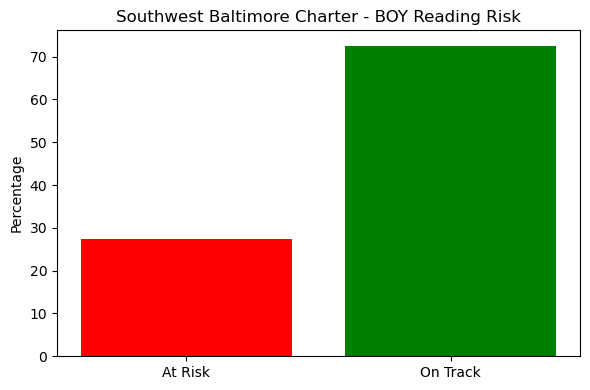

In [54]:
import matplotlib.pyplot as plt

# Data
at_risk_percentage = 27.5
on_track_percentage = 72.5

# Bar chart for Southwest Baltimore Charter
plt.figure(figsize=(6, 4))
plt.bar(['At Risk', 'On Track'], [at_risk_percentage, on_track_percentage], color=['red', 'green'])
plt.title('Southwest Baltimore Charter - BOY Reading Risk')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

### BOY Math cut scores from i-Ready

In [21]:
# BOY Math cut scores from i-Ready
math_boy_cut = {
    0: 318,  # K
    1: 347,
    2: 387,
    3: 413,
    4: 434,
    5: 450
}

In [22]:
# Add math_boy_risk based on BOY cut scores and grade
swb_boy_only['math_boy_risk'] = swb_boy_only.apply(
    lambda row: 'At Risk' if row['math_boy'] < math_boy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

### Count of students by math risk status

In [23]:
# Count of students by math risk status
swb_boy_only['math_boy_risk'].value_counts()

On Track    30
At Risk     10
Name: math_boy_risk, dtype: int64

### Percent of students at risk in math

In [24]:
# Percent of students at risk in math
swb_boy_only['math_boy_risk'].value_counts(normalize=True) * 100

On Track    75.0
At Risk     25.0
Name: math_boy_risk, dtype: float64

### Southwest Baltimore Charter was excluded from growth and MOY risk analysis due to missing midyear scores. However, based on BOY diagnostics alone, 27.5% of students were flagged as At Risk in reading, and 25.0% in math.

### These early scores suggest a similar need for academic intervention as observed in other After 3 partner schools. If MOY scores followed the same trend, it's likely these students would show comparable risk patterns and benefit from targeted support.
________________________________________________________________________________


## Define the MOY cut scores for each grade (for the rest of the schools)

In [26]:
# Step 1: Define the MOY cut scores for each grade
math_moy_cut = {
    0: 334,
    1: 365,
    2: 402,
    3: 427,
    4: 446,
    5: 459
}

reading_moy_cut = {
    0: 320,
    1: 374,
    2: 441,
    3: 491,
    4: 508,
    5: 552
}

In [27]:
# Make sure MOY score columns are numeric (if they aren’t already)
df['math_moy'] = pd.to_numeric(df['math_moy'], errors='coerce')
df['reading_moy'] = pd.to_numeric(df['reading_moy'], errors='coerce')

# Apply the risk label for Math MOY
df['math_risk_result'] = df.apply(
    lambda row: 'At Risk' if row['math_moy'] < math_moy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

# Apply the risk label for Reading MOY
df['reading_risk_result'] = df.apply(
    lambda row: 'At Risk' if row['reading_moy'] < reading_moy_cut.get(row['grade'], float('inf')) else 'On Track',
    axis=1
)

In [28]:
df.head(60)

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,zipcode,type,median_household_income,median_household_income_in_Maryland,grade,math_risk_result,reading_risk_result
0,S001,Charles Carroll Barrister Elementary,K,350.0,375.0,399.0,458.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0,On Track,On Track
2,S003,Charles Carroll Barrister Elementary,K,301.0,309.0,249.0,324.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0,At Risk,On Track
3,S004,Charles Carroll Barrister Elementary,1st,364.0,382.0,326.0,370.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,At Risk
4,S005,Charles Carroll Barrister Elementary,1st,375.0,380.0,325.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,On Track
5,S006,Charles Carroll Barrister Elementary,1st,352.0,321.0,310.0,361.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,At Risk,At Risk
6,S007,Charles Carroll Barrister Elementary,1st,382.0,385.0,326.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,On Track
7,S008,Charles Carroll Barrister Elementary,1st,360.0,359.0,318.0,365.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,At Risk,At Risk
8,S009,Charles Carroll Barrister Elementary,1st,319.0,356.0,302.0,353.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,At Risk,At Risk
9,S010,Charles Carroll Barrister Elementary,1st,354.0,370.0,327.0,376.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,On Track
10,S011,Charles Carroll Barrister Elementary,2nd,404.0,417.0,359.0,436.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,2.0,On Track,At Risk


In [29]:
# Count of students by reading risk status
df['reading_risk_result'].value_counts()

On Track    70
At Risk     63
Name: reading_risk_result, dtype: int64

In [30]:
# Percent of students at risk in reading
df['reading_risk_result'].value_counts(normalize=True) * 100

On Track    52.631579
At Risk     47.368421
Name: reading_risk_result, dtype: float64

i-Ready Reading Risk (MOY) — Across All Schools
Total students with MOY reading scores: 133

“At Risk” in Reading: 63 students - 47.4%

“On Track” in Reading: 70 students - 52.6%

### Based on midyear i-Ready Reading scores, nearly half of the students (47.4%) in the After 3 program were flagged as “At Risk” for reading difficulty according to national benchmarks. This highlights a continued need for focused literacy support across participating schools.

In [31]:
df['math_risk_result'].value_counts()

On Track    91
At Risk     42
Name: math_risk_result, dtype: int64

In [32]:
df['math_risk_result'].value_counts(normalize=True) * 100

On Track    68.421053
At Risk     31.578947
Name: math_risk_result, dtype: float64

i-Ready Math Risk (MOY) — Across All Schools
Total students with MOY math scores: 133

“At Risk” in Math: 42 students - 31.6%

“On Track” in Math: 91 students - 68.4%

### At midyear, approximately 1 in 3 students (31.6%) in the After 3 program were flagged as “At Risk” for math difficulty based on i-Ready MOY benchmarks. Compared to reading (47.4% At Risk), math outcomes appear stronger overall — though both subjects show a continued need for individualized academic support.

Checkpoint:

* Cleaned and structured the dataset
    * Cleaned grade_level into a usable grade column
    * Fixed invalid scores and dropped unnecessary rows
* Created indicators of student need
    * reading_boy_risk and math_boy_risk for BOY-only students (like Southwest Baltimore)
    * reading_risk_result and math_risk_result for all students with MOY scores
* Built actionable insightsAnalysis so far: 

#### Nearly half of students are At Risk in reading

#### 1 in 3 are At Risk in math

#### Southwest Baltimore, while excluded from growth analysis, still shows need based on BOY data



In [33]:
# Count of At Risk vs. On Track per school (Reading)
reading_risk_by_school = df.groupby(['school_name', 'reading_risk_result']).size().unstack(fill_value=0)

# Add a total and percent at risk column
reading_risk_by_school['Total'] = reading_risk_by_school.sum(axis=1)
reading_risk_by_school['% At Risk'] = (reading_risk_by_school['At Risk'] / reading_risk_by_school['Total']) * 100

reading_risk_by_school

reading_risk_result,At Risk,On Track,Total,% At Risk
school_name,,,,
Charles Carroll Barrister Elementary,28,7,35,80.000000
George Washington Elementary,35,16,51,68.627451
Southwest Baltimore Charter,0,47,47,0.000000


In [34]:
# Filter out students without MOY scores before doing groupby
reading_risk_by_school = df[df['reading_moy'].notnull()].groupby(['school_name', 'reading_risk_result']).size().unstack(fill_value=0)

# Add total and % at risk again
reading_risk_by_school['Total'] = reading_risk_by_school.sum(axis=1)
reading_risk_by_school['% At Risk'] = (reading_risk_by_school['At Risk'] / reading_risk_by_school['Total']) * 100

reading_risk_by_school

reading_risk_result,At Risk,On Track,Total,% At Risk
school_name,,,,
Charles Carroll Barrister Elementary,28,5,33,84.848485
George Washington Elementary,35,10,45,77.777778


### The MOY risk analysis includes only Charles Carroll Barrister and George Washington Elementary, as Southwest Baltimore Charter did not complete midyear diagnostics. A separate BOY-only analysis was conducted for Southwest to ensure those students were not excluded entirely from the data story.

In [35]:
# Filter to only rows with MOY math scores
math_risk_by_school = df[df['math_moy'].notnull()].groupby(['school_name', 'math_risk_result']).size().unstack(fill_value=0)

# Add total and % At Risk
math_risk_by_school['Total'] = math_risk_by_school.sum(axis=1)
math_risk_by_school['% At Risk'] = (math_risk_by_school['At Risk'] / math_risk_by_school['Total']) * 100

# View the result
math_risk_by_school

math_risk_result,At Risk,On Track,Total,% At Risk
school_name,,,,
Charles Carroll Barrister Elementary,20,13,33,60.606061
George Washington Elementary,22,19,41,53.658537


### In math, over half of students at both partner schools were flagged as At Risk using i-Ready MOY cut scores.
### Charles Carroll Barrister had the highest percentage, with 60.6% of students needing additional math support, compared to 53.7% at George Washington Elementary.

In [36]:
# Create growth columns
df['reading_growth'] = df['reading_moy'] - df['reading_boy']
df['math_growth'] = df['math_moy'] - df['math_boy']

# Preview a few rows to confirm
df[['student_id', 'grade', 'reading_boy', 'reading_moy', 'reading_growth', 'math_boy', 'math_moy', 'math_growth']].head()

,student_id,grade,reading_boy,reading_moy,reading_growth,math_boy,math_moy,math_growth
0,S001,0.0,399.0,458.0,59.0,350.0,375.0,25.0
2,S003,0.0,249.0,324.0,75.0,301.0,309.0,8.0
3,S004,1.0,326.0,370.0,44.0,364.0,382.0,18.0
4,S005,1.0,325.0,382.0,57.0,375.0,380.0,5.0
5,S006,1.0,310.0,361.0,51.0,352.0,321.0,-31.0


In [37]:
df

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,zipcode,type,median_household_income,median_household_income_in_Maryland,grade,math_risk_result,reading_risk_result,reading_growth,math_growth
0,S001,Charles Carroll Barrister Elementary,K,350.0,375.0,399.0,458.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0,On Track,On Track,59.0,25.0
2,S003,Charles Carroll Barrister Elementary,K,301.0,309.0,249.0,324.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,0.0,At Risk,On Track,75.0,8.0
3,S004,Charles Carroll Barrister Elementary,1st,364.0,382.0,326.0,370.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,At Risk,44.0,18.0
4,S005,Charles Carroll Barrister Elementary,1st,375.0,380.0,325.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,On Track,On Track,57.0,5.0
5,S006,Charles Carroll Barrister Elementary,1st,352.0,321.0,310.0,361.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,21230,Traditional,94164,98678,1.0,At Risk,At Risk,51.0,-31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,S142,Southwest Baltimore Charter,4th,415.0,NaN,516.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN
142,S143,Southwest Baltimore Charter,4th,435.0,NaN,480.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN
143,S144,Southwest Baltimore Charter,4th,397.0,NaN,439.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN
144,S145,Southwest Baltimore Charter,4th,NaN,NaN,474.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,21223,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN


In [38]:
# Calculate average reading and math growth by school
avg_growth_by_school = df.groupby('school_name')[['reading_growth', 'math_growth']].mean().round(2)

avg_growth_by_school

,reading_growth,math_growth
school_name,,
Charles Carroll Barrister Elementary,56.12,14.67
George Washington Elementary,68.16,16.40
Southwest Baltimore Charter,NaN,NaN


Students at George Washington showed stronger average growth in both subjects

Reading growth is significantly higher than math growth at both schools

Southwest Baltimore is blank (as expected) — no MOY data

From fall to midyear, students in the After 3 program saw significant reading growth across both schools, with George Washington students gaining an average of 68.16 points and Charles Carroll students gaining 56.12 points. Math growth was smaller in comparison, but still positive, with both schools averaging more than 14 points of improvement.

In [39]:
# Average growth by grade (reading and math)
avg_growth_by_grade = df.groupby('grade')[['reading_growth', 'math_growth']].mean().round(2)

avg_growth_by_grade

,reading_growth,math_growth
grade,,
0.0,89.88,16.50
1.0,52.00,11.38
2.0,55.63,11.60
3.0,67.00,18.38
4.0,NaN,NaN
5.0,62.55,22.91


### Key Takeaways
    
Kindergarteners showed the biggest reading gains — almost +90 points

5th graders had the strongest math gains (+22.91 points)

4th grade is empty — most likely limited or no MOY data for that group

Growth in reading is strong across all available grades — indicative of literacy progress

Kindergarten and 3rd grade students demonstrated the strongest reading growth, while 5th graders showed the most math progress. These trends may reflect developmental readiness or effective programming at specific grade levels. 

In [40]:
# Flag high-growth students in reading and math (30 points or more)
df['reading_growth_flag'] = df['reading_growth'].apply(
    lambda x: 'High Growth' if pd.notnull(x) and x >= 30 else 'Typical/Low'
)

df['math_growth_flag'] = df['math_growth'].apply(
    lambda x: 'High Growth' if pd.notnull(x) and x >= 30 else 'Typical/Low'
)

# Preview a few rows
df[['student_id', 'reading_growth', 'reading_growth_flag', 'math_growth', 'math_growth_flag']].head()

,student_id,reading_growth,reading_growth_flag,math_growth,math_growth_flag
0,S001,59.0,High Growth,25.0,Typical/Low
2,S003,75.0,High Growth,8.0,Typical/Low
3,S004,44.0,High Growth,18.0,Typical/Low
4,S005,57.0,High Growth,5.0,Typical/Low
5,S006,51.0,High Growth,-31.0,Typical/Low


In [41]:
df

,student_id,school_name,grade_level,math_boy,math_moy,reading_boy,reading_moy,address,longitude,latitude,...,type,median_household_income,median_household_income_in_Maryland,grade,math_risk_result,reading_risk_result,reading_growth,math_growth,reading_growth_flag,math_growth_flag
0,S001,Charles Carroll Barrister Elementary,K,350.0,375.0,399.0,458.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,...,Traditional,94164,98678,0.0,On Track,On Track,59.0,25.0,High Growth,Typical/Low
2,S003,Charles Carroll Barrister Elementary,K,301.0,309.0,249.0,324.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,...,Traditional,94164,98678,0.0,At Risk,On Track,75.0,8.0,High Growth,Typical/Low
3,S004,Charles Carroll Barrister Elementary,1st,364.0,382.0,326.0,370.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,...,Traditional,94164,98678,1.0,On Track,At Risk,44.0,18.0,High Growth,Typical/Low
4,S005,Charles Carroll Barrister Elementary,1st,375.0,380.0,325.0,382.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,...,Traditional,94164,98678,1.0,On Track,On Track,57.0,5.0,High Growth,Typical/Low
5,S006,Charles Carroll Barrister Elementary,1st,352.0,321.0,310.0,361.0,"1327 Washington Boulevard Baltimore, MD 21230",1.415342e+06,587727.427159,...,Traditional,94164,98678,1.0,At Risk,At Risk,51.0,-31.0,High Growth,Typical/Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,S142,Southwest Baltimore Charter,4th,415.0,NaN,516.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,...,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN,Typical/Low,Typical/Low
142,S143,Southwest Baltimore Charter,4th,435.0,NaN,480.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,...,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN,Typical/Low,Typical/Low
143,S144,Southwest Baltimore Charter,4th,397.0,NaN,439.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,...,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN,Typical/Low,Typical/Low
144,S145,Southwest Baltimore Charter,4th,NaN,NaN,474.0,NaN,"1300 Herkimer Street Baltimore, MD 21223",1.414747e+06,588388.613501,...,Charter,41828,98678,4.0,On Track,On Track,NaN,NaN,Typical/Low,Typical/Low


In [42]:
# Count of high-growth students in reading
df['reading_growth_flag'].value_counts()

High Growth    78
Typical/Low    55
Name: reading_growth_flag, dtype: int64

In [43]:
# % of students with high reading growth
df['reading_growth_flag'].value_counts(normalize=True) * 100

High Growth    58.646617
Typical/Low    41.353383
Name: reading_growth_flag, dtype: float64

In [44]:
# Count of high-growth students in math
df['math_growth_flag'].value_counts()

Typical/Low    122
High Growth     11
Name: math_growth_flag, dtype: int64

In [45]:
# % of students with high math growth
df['math_growth_flag'].value_counts(normalize=True) * 100

Typical/Low    91.729323
High Growth     8.270677
Name: math_growth_flag, dtype: float64

### High-Growth Student Summary
#### Reading

78 students hit High Growth (≥ +30 points)

That’s 58.6% of students with BOY + MOY reading scores

More than half of students showed strong reading gains midyear

#### Math
Only 11 students hit High Growth (≥ +30 points)

Only 8.3%

### Summary 
Over 58% of students in the After 3 program demonstrated high growth in reading from BOY to MOY — which is a good sign of literacy progress midyear. In contrast, only 8.3% of students achieved high growth in math, suggesting additional support may be needed in this subject to accelerate gains.

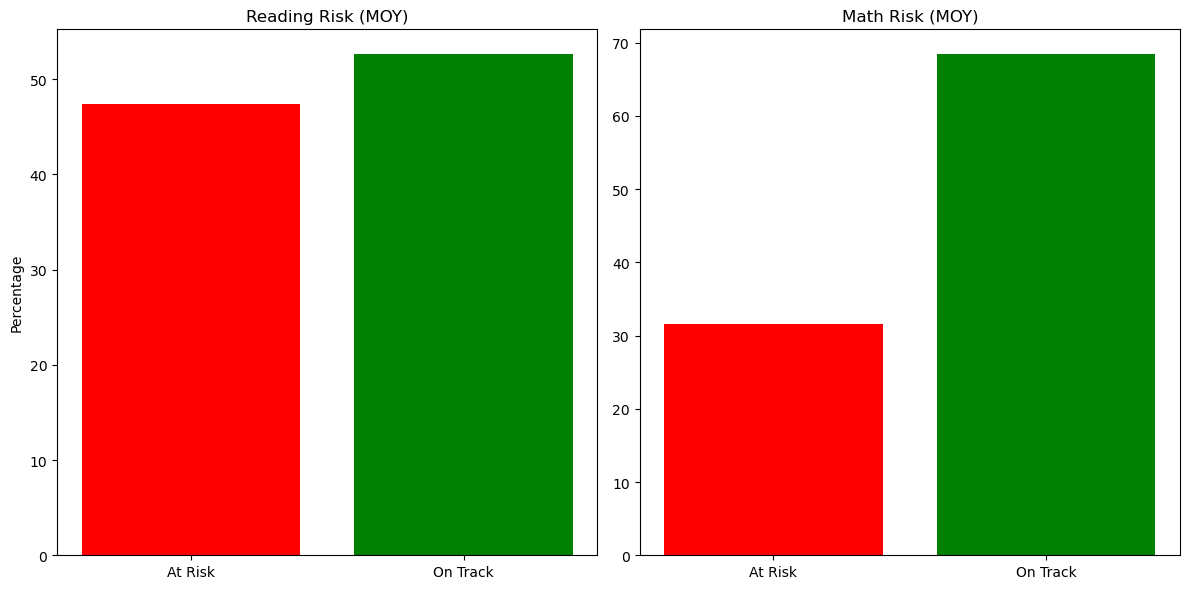

In [56]:
# Data for MOY (percentages)
reading_at_risk = 47.4
reading_on_track = 52.6
math_at_risk = 31.6
math_on_track = 68.4

# Create side-by-side bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Reading risk bar
ax[0].bar(['At Risk', 'On Track'], [reading_at_risk, reading_on_track], color=['red', 'green'])
ax[0].set_title('Reading Risk (MOY)')
ax[0].set_ylabel('Percentage')

# Math risk bar
ax[1].bar(['At Risk', 'On Track'], [math_at_risk, math_on_track], color=['red', 'green'])
ax[1].set_title('Math Risk (MOY)')

plt.tight_layout()
plt.show()

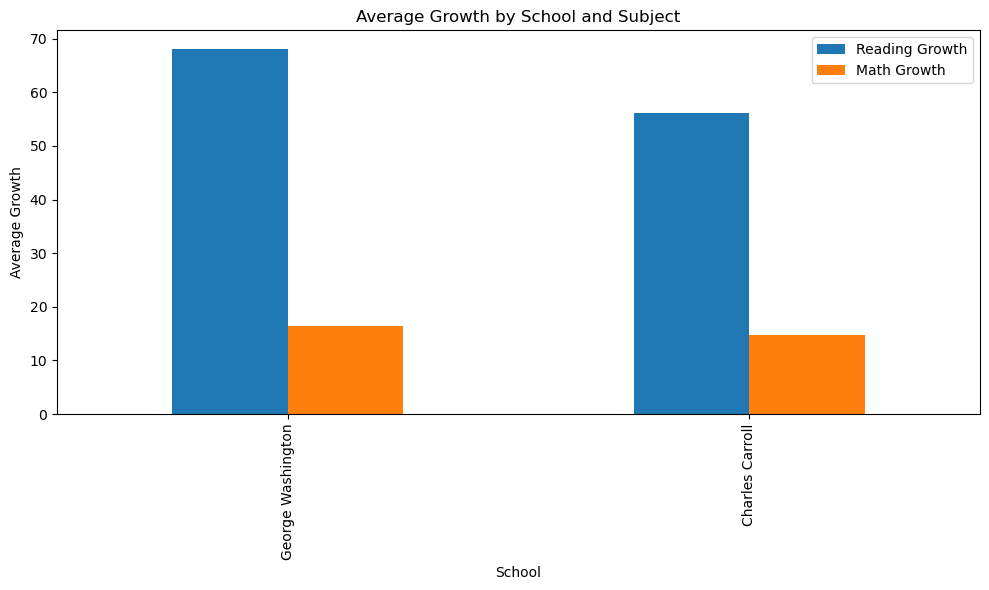

In [55]:
import seaborn as sns

# Data for growth by school and subject
data = {
    'School': ['George Washington', 'Charles Carroll'],
    'Reading Growth': [68.16, 56.12],
    'Math Growth': [16.40, 14.67]
}

df_growth = pd.DataFrame(data)

# Create bar chart for growth by school and subject
df_growth.set_index('School').plot(kind='bar', figsize=(10, 6))
plt.title('Average Growth by School and Subject')
plt.ylabel('Average Growth')
plt.tight_layout()
plt.show()

# Logistic Regression 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a clean dataset for modeling
logreg_df = df[['reading_boy', 'grade', 'median_household_income', 'reading_risk_result']].dropna()

# Step 2: Encode target as 1 = At Risk, 0 = On Track
logreg_df['risk_binary'] = logreg_df['reading_risk_result'].apply(lambda x: 1 if x == 'At Risk' else 0)

# Preview the cleaned dataset
logreg_df.head()

,reading_boy,grade,median_household_income,reading_risk_result,risk_binary
0,399.0,0.0,94164,On Track,0
2,249.0,0.0,94164,On Track,0
3,326.0,1.0,94164,At Risk,1
4,325.0,1.0,94164,On Track,0
5,310.0,1.0,94164,At Risk,1


### Step 1: Import ML Packages + Select Columns

In [47]:
# Step 1: Define features (X) and target (y)
X = logreg_df[['reading_boy', 'grade', 'median_household_income']]
y = logreg_df['risk_binary']

# Step 2: Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

### Step 2: Split the Data and Train the Model

In [49]:
# Step 1: Define features (X) and target (y)
X = logreg_df[['reading_boy', 'grade', 'median_household_income']]
y = logreg_df['risk_binary']

# Step 2: Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

### Step 3: Evaluate the Model

In [50]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9  3]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.80      1.00      0.89        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



The model correctly identified all students who were At Risk at midyear — achieving a 100% recall rate. While it made 3 false positive predictions, its overall accuracy was 88%, and its precision for At Risk predictions was 80%. These results suggest the model could serve as a strong early warning system for literacy intervention.

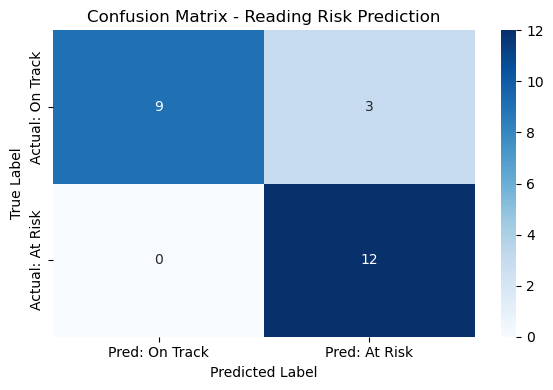

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix (assumes y_test and y_pred already exist)
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: On Track', 'Pred: At Risk'],
            yticklabels=['Actual: On Track', 'Actual: At Risk'])
plt.title('Confusion Matrix - Reading Risk Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Logistic Regression Results: Predicting Reading Risk

Metric	Value
Accuracy	88% – the model got 21 out of 24 students right
Precision (At Risk)	80% – when the model predicted "At Risk", it was right 80% of the time
Recall (At Risk)	100% – it caught all of the actual At Risk students
False Positives	3 students were flagged “At Risk” but weren’t
False Negatives	0 – it didn’t miss any At Risk students


Using just BOY reading scores, grade level, and household income, we trained a logistic regression model that correctly predicted 88% of student risk statuses.
Notably, the model had 100% recall, meaning it correctly identified all students flagged as “At Risk” at midyear — making it a strong early-warning tool for potential intervention.

In [52]:
# Get feature importance from model coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficients (strongest influence)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Show results
feature_importance[['Feature', 'Coefficient']]

,Feature,Coefficient
0,reading_boy,-0.012942
2,median_household_income,0.000060
1,grade,-0.000010


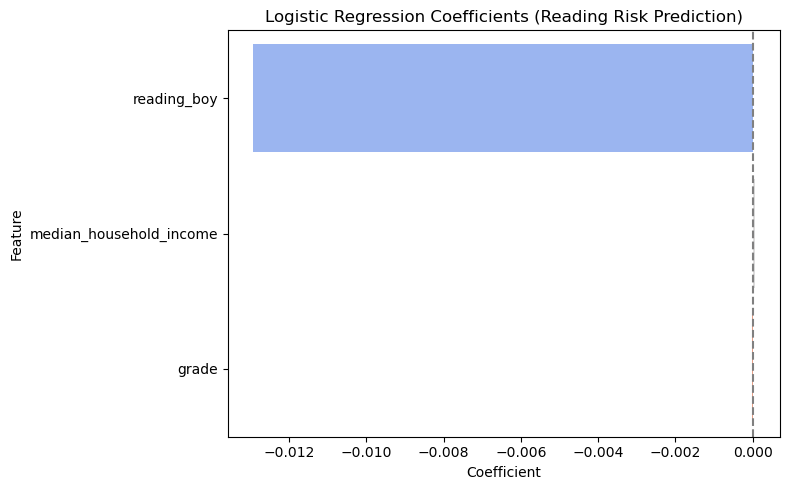

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance from model coefficients
features = ['reading_boy', 'grade', 'median_household_income']
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Logistic Regression Coefficients (Reading Risk Prediction)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()